In [2]:
import numpy as np   # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
# first we have to put name on columns
data_header = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','income']

adult_data = pd.read_csv('adult.csv', names = data_header)
adult_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_data.shape

(32561, 15)

In [5]:
# show information of dataset
adult_data.info

<bound method DataFrame.info of        Age          Workclass  fnlwgt    Education  Education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital_Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   

In [6]:
adult_data.describe().T
# نتیجه گیری
# با توجه به std  بالا در ستون های capital-gain and capital-lose و مقادرشون در دبتاست متوجه می شیم که اکثر داده در این دو تا ستون صفر است.
#  اfnlwgt وزن افراد است که معمولاً به جمعیت شناسی آنها بستگی دارد، بنابراین باید آن را با کشوری که به آن تعلق دارند در نظر بگیریم.

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hrs_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
# ************************    Let's start analyze features    ***************************

In [8]:
# income
# our Target in this dataset is income
# این متغیر نشان دهنده این است که آن شخض سالانه درامدش بیشتر از ۵۰ هزار دلار است یا کمتر
adult_data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [9]:
# چون فقد دو مقدار داریم مقادیر زا با صفر و یک جایگزین می کنیم
income_dic ={' <=50K':1,' >50K':0}
adult_data['income']=adult_data['income'].map(income_dic).astype(int)
adult_data['income'].value_counts()

1    24720
0     7841
Name: income, dtype: int64

In [10]:
adult_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [11]:
# workclass
# Class of work
# این ویژگی نشان دهنده ی این است که یک شخص از چ طریقی درامد دارد. یعنی کجا کار می کنه: مصلا تو بخش خصوصیه با تو دولت کار میکنه یا اصلا حقوق نم گیرد.
adult_data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [12]:
#this column have missing value
# تبدبل ؟ به nan
adult_data['Workclass'] = adult_data['Workclass'].replace(' ?',np.nan)

In [13]:
# Education
# Education level
adult_data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [14]:
# Education-num
# Numeric education level
adult_data['Education-num'].unique()
# 0 to 16

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [15]:
# fnlwgt
# وزن نهایی این که چه تعداد از جمعیت را نمایندگی می کند
adult_data['fnlwgt'].unique()
# Min: 12285
# Max: 1490400

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302])

In [16]:
# Marital_Status
# وضعیت تأهل فرد
adult_data['Marital_Status'].unique()
adult_data['Marital_Status'].value_counts()


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64

In [17]:
# Occupation
#شغل فرد
adult_data['Occupation'].unique()
# دیتا null وجود دارد
adult_data['Occupation'] = adult_data['Occupation'].replace(' ?',np.nan)


In [18]:
# Relationship
# نوع رابطه
adult_data['Relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [19]:
# Race
# نژاد شخص
adult_data['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [20]:
# Sex
# جنسیت یک فرد
adult_data['Sex'].unique()
# تبدیل به داده های عددی
adult_data['Sex'] = adult_data['Sex'].map({' Male':1,' Female':0}).astype(int)
adult_data['Sex'].value_counts()

1    21790
0    10771
Name: Sex, dtype: int64

In [21]:
# Capital-gain
#سود سرمایه به دست آمده
adult_data['Capital-gain'].unique()
# Min: 0
#Max: 99999

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [22]:
# capital_loss
# از دست دادن سرمایه
#adult_data['Capital-loss'].unique()
#Min: 0
#Max: 4356

In [23]:
# hours_per_week
# میانگین تعداد ساعات کار در هفته
# Min: 1
# Max: 99

In [24]:
# native_country
# کشور مبدا
adult_data['Native-Country'].unique()
# حذف ؟
adult_data['Native-Country'] = adult_data['Native-Country'].replace(' ?',np.nan)


In [25]:
# ********************  Show relevency with heat map **********************

<AxesSubplot:>

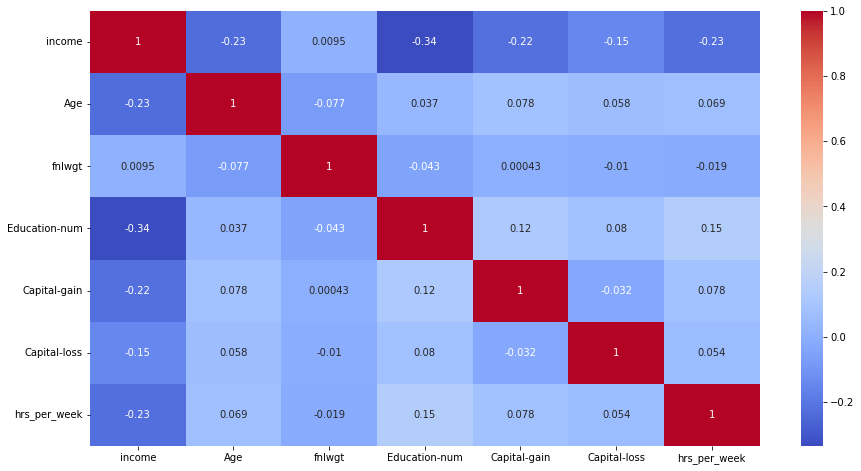

In [26]:
# Group all continous variables
df_continous = adult_data[['income', 'Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']]
# Correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(data=df_continous.corr(), annot=True,  cmap="coolwarm")

In [27]:
# طبق نمودار بالا fnlwgt با income همبستگی بالایی ندارد پس می توانیم از دیتاست حذفش کنبم
adult_data.drop(['fnlwgt'], axis=1,  inplace=True)

In [28]:
# حذف Eduacatim-num
adult_data['Education'].value_counts()


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [29]:
adult_data['Education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education-num, dtype: int64

In [30]:
# طیق دو کد بالا ستون Eduacation and Eduacatin-num مقادیر یکسانی دارند پس میتوانیم یکی را حذف کنیم
adult_data.drop(['Education-num'], axis=1,  inplace=True)

In [31]:
adult_data.shape

(32561, 13)

In [32]:
# حذف داده های تکراری
adult_data.drop_duplicates(inplace=True)
adult_data.reset_index(drop=True, inplace=True)
adult_data.shape

(29096, 13)

In [33]:
# حذف مفادیر nan
adult_data.dropna(how='any',inplace=True)
adult_data.shape

(26904, 13)

In [34]:
# تبدیل داده ها به مقادیر عددی
data = pd.get_dummies(adult_data)
data.sample(n=50)

,Age,Sex,Capital-gain,Capital-loss,hrs_per_week,income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-Country_ Portugal,Native-Country_ Puerto-Rico,Native-Country_ Scotland,Native-Country_ South,Native-Country_ Taiwan,Native-Country_ Thailand,Native-Country_ Trinadad&Tobago,Native-Country_ United-States,Native-Country_ Vietnam,Native-Country_ Yugoslavia
22104,32,0,5013,0,45,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2516,25,1,0,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22776,47,1,5178,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22309,24,1,0,0,55,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15318,56,1,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26406,22,1,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8132,23,1,0,0,35,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1579,26,1,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15080,39,1,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
25946,63,0,14084,0,60,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [35]:
# start normalizing
# اول می خواستیم قبل از تقستیم داده هامون داده ها رو scale کنبم ولی متوجه شدیم باید فقد روی داده های اموزشی این کار رو کنیم چون در دنیای واقعی داده ها به صورت  scale شده نیستن
# adult_data_scale = normalize(data, norm='l2')
# adult_data = pd.DataFrame(adult_data_scale, index=data.index, columns=data.columns)
# adult_data.head()

In [36]:
# delete outliers

# columns = adult_data.columns
# for feature in columns:
#     lower_th = 0
#     upper_th = 0
#     Q1 = np.quantile(adult_data[feature], 0.25)
#     Q3 = np.quantile(adult_data[feature], 0.75)
#     IQR = Q3 - Q1
#
#     lower_th =  Q1 - 1.5*IQR
#     upper_th =  Q3 + 1.5*IQR
#     new_data = adult_data[feature][~((adult_data[feature] < (lower_th)) | (adult_data[feature] > (upper_th)))]



In [37]:
# ************************    start design artificial neural networks     ***************************

In [38]:
#   تقسیم مجموعه‌داده‌ها را به سه بخش train, validation, test
from sklearn.model_selection import train_test_split

train = data.drop(['income'],axis=1) # our dataset without target
target =data['income'] # target

split_size=0.3

# Creation of Train and Test dataset
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=split_size, random_state=22)

#Creation of Train and validation dataset
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,train_size=0.5,random_state=5)


In [39]:
# ا scale کردن داده های اموزشی
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)



In [40]:
# define neural network
# در همه ی دیتاست ها ما یک لایه ورودی و نعداد نودهای اون برابر است با تعداد ویژگی ها
# یا توجه به این که ما میخواهیم یک عدد را پیش بینی کنیم در نتیجه با یک لایه خروجی با بک نود داریم
# طبق ازمایش ها و سرچ هایی که انجام دادیم یک لایه ی پنهان در اکثر دیتا ست ها به خوبی عمل می کند پس ما یک لایه پنهان داریم و تعداد نود های آن را برابر با نصف تعداد ورودی هامون گرفتیم

In [41]:
    # create mlp CLassifier
# neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(51, ), max_iter=1000, random_state=1) # یک لایه مخفی باتعداد ۵۲ نود
# hidden_layer_sizes این عنصر تعداد نورون های لایه پنهان را نشان می دهد.
#  max_iter حداکثر تعداد تکرار
# random_state تولید اعداد تصادفی را برای وزن‌ها و مقدار اولیه بایاس تعیین می‌کند،
mlp.fit(X_train, y_train.values)  # اموزش شبکه عصبی]

predictions = mlp.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
# با توجه به ماتریکس 1022 از داد های تست مربوط به درامد بالای ۵۰ هزار دلار است و درست پیشبینی شده اندو ۵۶۶۹ از داده ها زیر ۵۰ هزار دلار است
print(classification_report(y_test,predictions))

[[1210  789]
 [ 705 5368]]
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1999
           1       0.87      0.88      0.88      6073

    accuracy                           0.81      8072
   macro avg       0.75      0.74      0.75      8072
weighted avg       0.81      0.81      0.81      8072



In [42]:
#  پارامترهای بهینه مربوط به شبکه عصبی
from sklearn.model_selection import GridSearchCV

params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(51,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=1), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# param_grid :Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.
# n_job : Number of jobs to run in parallel.
# cv : استراتژی تقسیم اعتبار متقابل را تعیین می کند
# verbose :Controls the verbosity: the higher, the more messages.

mlp_classif_grid.fit(x_val,y_val)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic', 'identity'],
                         'hidden_layer_sizes': [(51,)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             verbose=5)

In [43]:
print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

Train Accuracy : 0.741
Test Accuracy : 0.741
Best Accuracy Through Grid Search : 0.827
Best Parameters :  {'activation': 'relu', 'hidden_layer_sizes': (51,), 'learning_rate': 'constant', 'solver': 'adam'}


/home/mary/Ml/taklif-2/venv/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/mary/Ml/taklif-2/venv/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [44]:
# Create logistic regression second model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test) # مدل زوی داده ی تست پیش بینی میکند بعد از اموزش

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,prediction))

print(classification_report(y_test,prediction))


[[1240  759]
 [ 492 5581]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.66      1999
           1       0.88      0.92      0.90      6073

    accuracy                           0.85      8072
   macro avg       0.80      0.77      0.78      8072
weighted avg       0.84      0.85      0.84      8072



In [45]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'C': [1000, 100, 20, 600], 'penalty': ['l2']}

logestic_reg_grid = GridSearchCV(LogisticRegression(), param_grid=parameter_grid, n_jobs=-1, cv=5, verbose=5)

scaler.fit(x_val)
X_val = scaler.transform(x_val)
logestic_reg_grid.fit(X_val,y_val)

print('Train Accuracy : %.3f'%logestic_reg_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%logestic_reg_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%logestic_reg_grid.best_score_)
print('Best Parameters : ',logestic_reg_grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Train Accuracy : 0.839
Test Accuracy : 0.844
Best Accuracy Through Grid Search : 0.835
Best Parameters :  {'C': 1000, 'penalty': 'l2'}


In [83]:
# برای کشیدن نمودارها برای ساخت شبکه عصبی از کتابخانه ی keras استفاده کردیم
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([     # مدل Sequential یک پشته خطی از لایه ها است.
    keras.layers.Flatten(input_shape=(101,)),  # این تابع آرایه های چند بعدی را به آرایه های یک بعدی مسطح یا آرایه های تک بعدی تبدیل می کند.
    keras.layers.Dense(4, activation=tf.nn.relu), # hidden layer
    keras.layers.Dense(1, activation=tf.nn.sigmoid), # output layer
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=34, batch_size=1, validation_data=(X_val, y_val))

Epoch 1/34
9416/9416 [==============================] - 19s 2ms/step - loss: 0.1506 - accuracy: 0.7870 - val_loss: 0.1271 - val_accuracy: 0.8191
Epoch 2/34
9416/9416 [==============================] - 13s 1ms/step - loss: 0.1225 - accuracy: 0.8281 - val_loss: 0.1257 - val_accuracy: 0.8192
Epoch 3/34
9416/9416 [==============================] - 11s 1ms/step - loss: 0.1218 - accuracy: 0.8300 - val_loss: 0.1247 - val_accuracy: 0.8232
Epoch 4/34
9416/9416 [==============================] - 12s 1ms/step - loss: 0.1217 - accuracy: 0.8293 - val_loss: 0.1246 - val_accuracy: 0.8223
Epoch 5/34
9416/9416 [==============================] - 12s 1ms/step - loss: 0.1212 - accuracy: 0.8285 - val_loss: 0.1249 - val_accuracy: 0.8238
Epoch 6/34
9416/9416 [==============================] - 13s 1ms/step - loss: 0.1212 - accuracy: 0.8307 - val_loss: 0.1247 - val_accuracy: 0.8246
Epoch 7/34
9416/9416 [==============================] - 11s 1ms/step - loss: 0.1214 - accuracy: 0.8318 - val_loss: 0.1255 - val_ac

{'loss': [0.15060442686080933, 0.12252701073884964, 0.12178540229797363, 0.12167598307132721, 0.12124449759721756, 0.12117189913988113, 0.12135706096887589, 0.12139406055212021, 0.12161778658628464, 0.12133730947971344, 0.12167713791131973, 0.12169238179922104, 0.12128578871488571, 0.12158261239528656, 0.12151627987623215, 0.12140212953090668, 0.12157312780618668, 0.12174160778522491, 0.12139179557561874, 0.12152265757322311, 0.12157907336950302, 0.12140090763568878, 0.12172459810972214, 0.12133564800024033, 0.12152492254972458, 0.12134505808353424, 0.12132420390844345, 0.12130063027143478, 0.12159620225429535, 0.12159924954175949, 0.12119350582361221, 0.1216157004237175, 0.12145717442035675, 0.12123458087444305], 'accuracy': [0.7869583964347839, 0.8280586004257202, 0.8299702405929565, 0.8293330669403076, 0.8284834027290344, 0.83071368932724, 0.8317757248878479, 0.8302888870239258, 0.8290144205093384, 0.8300764560699463, 0.8309260606765747, 0.833368718624115, 0.8296516537666321, 0.8283

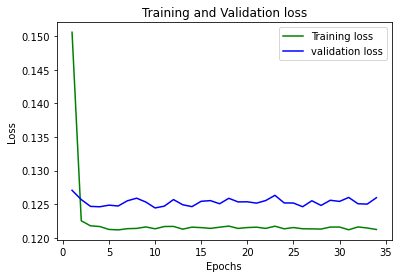

In [84]:
# draw loss diograms
print(history.history)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# طبق نمودار بالا  loss training و loss validation با هم ارتباطی ندارند. و loss validation در طول تکرار یکسان باقی می ماند و این به این معنی است که مشکل overfiting  رخ داده است
# می توان با کم کردن لایه ها و نورون های پنهان از برازش پیش از حد جلوگیری کند
# راه دیگه استفاده از dropout و با اضافه کردن ان به مدل به طور تصادفی برخی از زیرمجموعه‌های گره را در یک لایه مشخص در طول آموزش نادیده می‌گیرد، یعنی گره‌ها را از لایه حذف می‌کند

34
34


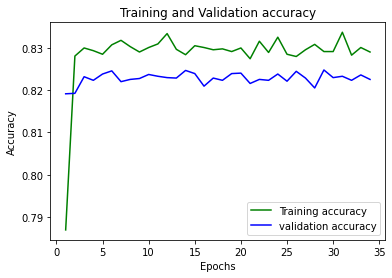

In [85]:
# draw accurecy loss diograms
loss_train = history.history['accuracy']
print(len(history.history['accuracy']))

loss_val = history.history['val_accuracy']
print(len(history.history['val_accuracy']))

epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()